In [ ]:
import re
import pandas as pd
import csv
import numpy as np
from collections import Counter
import nltk
import random
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec

In [ ]:
import tensorflow as tf
import math
import os
import time
import numpy as np
import pandas as pd
import random
import statistics
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential, regularizers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout, TimeDistributed, RepeatVector, Bidirectional
from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredLogarithmicError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy, Precision, AUC, Recall
from sklearn.metrics import silhouette_score

In [ ]:
pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184097 sha256=a38edc23f9bda69c7fe884305349b70a40ee7f539f323adfab499fc38d86be16
  Stored in directory: /root/.cache/pip/wheels/83/55/6b/552e083cf5509c0afe808b76cf434f1be284d01a112623bd37
Successfully built pyod


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_outlier = pd.read_csv('/content/drive/MyDrive/thesis/val/raw_val_all.csv', sep=',')

In [ ]:
df_outlier.head(5)

,message,label
0,2023-05-10 18:56:18.091 33 INFO nova.metadata....,1
1,2023-05-10 18:56:18.094 34 INFO nova.metadata....,1
2,2023-05-10 18:56:18.098 34 INFO nova.metadata....,1
3,2023-05-10 18:56:18.117 35 INFO nova.metadata....,1
4,2023-05-10 18:56:18.120 13 INFO nova.osapi_com...,1


In [ ]:
true_labels = df_outlier.label

In [ ]:
x_val = df_outlier.drop(['label'], axis =1)

In [ ]:
x_val.head(5)

,message
0,2023-05-10 18:56:18.091 33 INFO nova.metadata....
1,2023-05-10 18:56:18.094 34 INFO nova.metadata....
2,2023-05-10 18:56:18.098 34 INFO nova.metadata....
3,2023-05-10 18:56:18.117 35 INFO nova.metadata....
4,2023-05-10 18:56:18.120 13 INFO nova.osapi_com...


In [ ]:
df_validate = pd.read_csv('/content/drive/MyDrive/thesis/val/raw_val.csv', sep=',')

CV+IForest

In [ ]:
df_cv = pd.read_csv('/content/drive/MyDrive/thesis/train/cv_scaled.csv', sep=',')
x_out_cv = pd.read_csv('/content/drive/MyDrive/thesis/val/val-cv_out.csv', sep=',')

In [ ]:
x_out_val = pd.DataFrame(x_out_cv)

In [ ]:
x_out_val.head(5)

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0


In [ ]:
df_cv.head(5)

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007299,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
x_scaled_cv = mm_scaler.fit_transform(df_cv)

In [ ]:
x_out_cv = mm_scaler.transform(x_out_cv)

In [ ]:
split_len = 0.3 * len(df_cv)
split_len

306302.7

In [ ]:
test = df_cv[:int(split_len)]
train = df_cv[int(split_len):]

LSTM

In [ ]:
x_train = train.values.reshape(train.shape[0], 1, train.shape[1])
x_test = test.values.reshape(test.shape[0], 1,train.shape[1])


In [ ]:
x_out = x_out_cv.reshape(x_out_cv.shape[0], 1,x_out_cv.shape[1])

In [ ]:
#define the model

def autoencoder_model(X):

  inputs = Input(shape=(X.shape[1], X.shape[2]))
  L1 = Bidirectional(LSTM(128, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00)))(inputs)
  L2 = Bidirectional(LSTM(64, activation='relu', return_sequences=False))(L1)
  L3 = RepeatVector(X.shape[1])(L2)
  L4 = Bidirectional(LSTM(64, activation='relu', return_sequences=True))(L3)
  L5 = Bidirectional(LSTM(128, activation='relu', return_sequences=True))(L4)
  output = TimeDistributed(Dense(X.shape[2]))(L5)
  model = Model(inputs=inputs, outputs=output)
  return model


In [ ]:
# create the autoencoder model
model = autoencoder_model(x_train)
model.compile(optimizer='adam', loss=['mse'],
              metrics=['mae', 'acc', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 518)]          0         
                                                                 
 bidirectional (Bidirectiona  (None, 1, 256)           662528    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 repeat_vector (RepeatVector  (None, 1, 128)           0         
 )                                                               
                                                                 
 bidirectional_2 (Bidirectio  (None, 1, 128)           98816     
 nal)                                                        

In [ ]:
nb_epochs = 10
batch_size = 1000
history = model.fit(x_train, x_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.15).history

Epoch 1/10
608/608 [==============================] - 36s 29ms/step - loss: 0.0011 - mae: 0.0028 - acc: 0.0386 - recall: 0.3227 - precision: 0.9888 - val_loss: 4.6797e-04 - val_mae: 0.0013 - val_acc: 6.9025e-04 - val_recall: 0.4422 - val_precision: 0.9988
Epoch 2/10
608/608 [==============================] - 16s 26ms/step - loss: 8.9031e-05 - mae: 9.4604e-04 - acc: 0.4404 - recall: 0.3992 - precision: 0.9985 - val_loss: 3.6475e-04 - val_mae: 9.8237e-04 - val_acc: 0.6910 - val_recall: 0.3677 - val_precision: 0.9937
Epoch 3/10
608/608 [==============================] - 16s 26ms/step - loss: 2.8633e-05 - mae: 4.5858e-04 - acc: 0.4145 - recall: 0.3979 - precision: 0.9998 - val_loss: 3.3811e-04 - val_mae: 9.8955e-04 - val_acc: 0.0390 - val_recall: 0.3451 - val_precision: 0.9966
Epoch 4/10
608/608 [==============================] - 16s 26ms/step - loss: 2.0887e-05 - mae: 5.4702e-04 - acc: 0.3992 - recall: 0.4022 - precision: 0.9999 - val_loss: 3.2786e-04 - val_mae: 0.0010 - val_acc: 0.7146 -

22335/22335 [==============================] - 75s 3ms/step


<ipython-input-21-75a6f4c073f7>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue');


(0.0, 0.5)

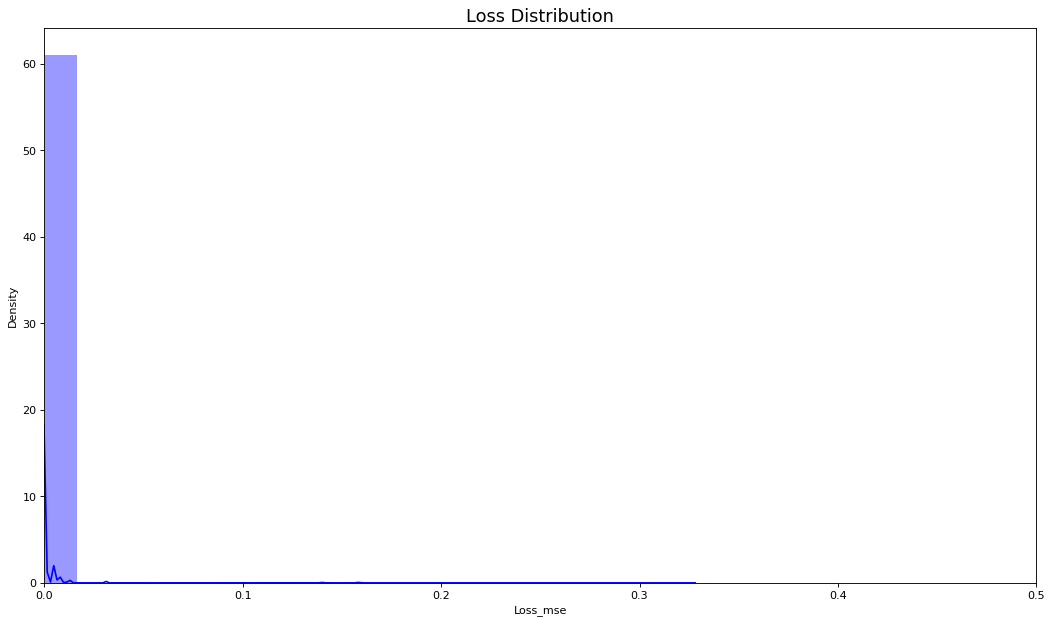

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(x_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = x_train.reshape(x_train.shape[0], x_train.shape[2])
scored['Loss_mse'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [ ]:
# calculate the loss on the test set
X_pred = model.predict(x_out)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=x_out_val.columns)
X_pred.index = x_out_val.index

scored = pd.DataFrame(index=x_out_val.index)
Xtest = x_out.reshape(x_out.shape[0], x_out.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.005
scored['Anomaly'] = np.where(scored['Loss_mae'] > scored['Threshold'], -1, 1)
scored.head()

3188/3188 [==============================] - 11s 3ms/step


,Loss_mae,Threshold,Anomaly
0,0.000333,0.005,1
1,0.000333,0.005,1
2,0.000333,0.005,1
3,0.000333,0.005,1
4,0.000446,0.005,1


In [ ]:
test_pred = scored.Anomaly

In [ ]:
Counter(test_pred)

Counter({1: 94934, -1: 7066})

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, test_pred))

              precision    recall  f1-score   support

          -1       1.00      0.54      0.70      3737
           1       0.98      1.00      0.99     98263

    accuracy                           0.98    102000
   macro avg       0.99      0.77      0.85    102000
weighted avg       0.98      0.98      0.98    102000



In [ ]:
clf = IsolationForest(n_estimators=200, contamination = 0.055)

In [ ]:
from pyod.models.copod import COPOD
if __name__ == "__main__":

    # train COPOD detector
    clf_name = 'COPOD'
    clf = COPOD(contamination=0.065)

    # you could try parallel version as well.
    # clf = COPOD(n_jobs=2)
    clf.fit(train)
    pred_test = clf.predict(x_out_cv_scale)

In [ ]:
if (pred_test == 1).any():
    pred_test[pred_test == 1] = -1

if (pred_test == 0).any():
    pred_test[pred_test == 0] = 1

In [ ]:
Counter(pred_test)

Counter({1: 94804, -1: 7196})

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

              precision    recall  f1-score   support

          -1       0.29      0.56      0.38      3737
           1       0.98      0.95      0.96     98263

    accuracy                           0.93    102000
   macro avg       0.64      0.75      0.67    102000
weighted avg       0.96      0.93      0.94    102000



In [ ]:
from pyod.models.ecod import ECOD
if __name__ == "__main__":

    # train COPOD detector
    clf_name = 'ECOD'
    clf = ECOD(contamination=0.055)

    # you could try parallel version as well.
    # clf = COPOD(n_jobs=2)
    clf.fit(train)
    pred_test = clf.predict(x_out_cv_scale)

if (pred_test == 1).any():
    pred_test[pred_test == 1] = -1

if (pred_test == 0).any():
    pred_test[pred_test == 0] = 1

Counter(pred_test)

Counter({1: 94819, -1: 7181})

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

              precision    recall  f1-score   support

          -1       0.29      0.56      0.38      3737
           1       0.98      0.95      0.96     98263

    accuracy                           0.93    102000
   macro avg       0.64      0.75      0.67    102000
weighted avg       0.96      0.93      0.94    102000



In [ ]:
from joblib import dump, load

# save the model
dump(clf,'/content/drive/MyDrive/thesis/models/copod/clf_co_cv.joblib')

In [ ]:
clf_if_cv = clf.fit(train)

In [ ]:
from joblib import dump, load

# save the model
dump(clf_if_cv,'/content/drive/MyDrive/thesis/models/iforest/clf_if_cv.joblib')

['/content/drive/MyDrive/thesis/models/iforest/clf_if_cv.joblib']

In [ ]:
from joblib import dump, load
clf_if_cv = load('/content/drive/MyDrive/thesis/models/iforest/clf_if_cv.joblib')

In [ ]:
pred_test = clf_if_cv.predict(x_out_cv_scale)

In [ ]:
Counter(pred_test)

Counter({1: 93967, -1: 8033})

In [ ]:
true_labels = df_outlier.label

In [ ]:
Counter(true_labels)

Counter({1: 98263, -1: 3737})

In [ ]:
df_validate['label'] = pred_test

In [ ]:
df_validate.head(5)

,message,label
0,2023-05-10 18:56:18.091 33 INFO nova.metadata....,1
1,2023-05-10 18:56:18.094 34 INFO nova.metadata....,1
2,2023-05-10 18:56:18.098 34 INFO nova.metadata....,1
3,2023-05-10 18:56:18.117 35 INFO nova.metadata....,1
4,2023-05-10 18:56:18.120 13 INFO nova.osapi_com...,1


In [ ]:
index_values = df_validate[df_validate['label'] == -1].index


In [ ]:
df_validate[df_validate['label'] == -1].to_csv('/content/drive/MyDrive/thesis/models/iforest/cv_results_val.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

              precision    recall  f1-score   support

          -1       0.38      0.82      0.52      3737
           1       0.99      0.95      0.97     98263

    accuracy                           0.94    102000
   macro avg       0.69      0.88      0.75    102000
weighted avg       0.97      0.94      0.95    102000



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the true labels for the dataset in 'true_labels' and the LOF predictions in 'lof_predictions'

# Convert LOF scores to binary labels based on a threshold (e.g., outliers with scores above the threshold are considered anomalies)

# Calculate accuracy
accuracy = accuracy_score(true_labels, pred_test)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, pred_test)
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, pred_test)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(true_labels, pred_test)
print("F1 Score:", f1)

Accuracy: 0.9558627450980393
Precision: 0.9767621604580448
Recall: 0.9774380997934116
F1 Score: 0.9771000132252257


CV+PCA rerun file changed

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/thesis/train/reduce_pca_cv.csv', sep = ',')
x_out = pd.read_csv('/content/drive/MyDrive/thesis/val/val-reduce_cv_pca.csv', sep = ',')

In [ ]:
split_len = 0.3 * len(df)
split_len

306302.7

In [ ]:
test = df[:int(split_len)]
train = df[int(split_len):]

In [ ]:
type(x_out)

pandas.core.frame.DataFrame

In [ ]:
x_train = train.values.reshape(train.shape[0], 1, train.shape[1])
x_test = test.values.reshape(test.shape[0], 1,train.shape[1])

x_out_val = x_out.values.reshape(x_out.shape[0], 1,x_out.shape[1])

#define the model

def autoencoder_model(X):

  inputs = Input(shape=(X.shape[1], X.shape[2]))
  L1 = Bidirectional(LSTM(128, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00)))(inputs)
  L2 = Bidirectional(LSTM(64, activation='relu', return_sequences=False))(L1)
  L3 = RepeatVector(X.shape[1])(L2)
  L4 = Bidirectional(LSTM(64, activation='relu', return_sequences=True))(L3)
  L5 = Bidirectional(LSTM(128, activation='relu', return_sequences=True))(L4)
  output = TimeDistributed(Dense(X.shape[2]))(L5)
  model = Model(inputs=inputs, outputs=output)
  return model


# create the autoencoder model
model = autoencoder_model(x_train)
model.compile(optimizer='adam', loss=['mse'],
              metrics=['mae', 'acc', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model.summary()

nb_epochs = 10
batch_size = 1000
history = model.fit(x_train, x_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.15).history

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 25)]           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 1, 256)           157696    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 128)           0         
 or)                                                             
                                                                 
 bidirectional_6 (Bidirectio  (None, 1, 128)           98816     
 nal)                                                      

22335/22335 [==============================] - 74s 3ms/step


<ipython-input-32-75a6f4c073f7>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue');


(0.0, 0.5)

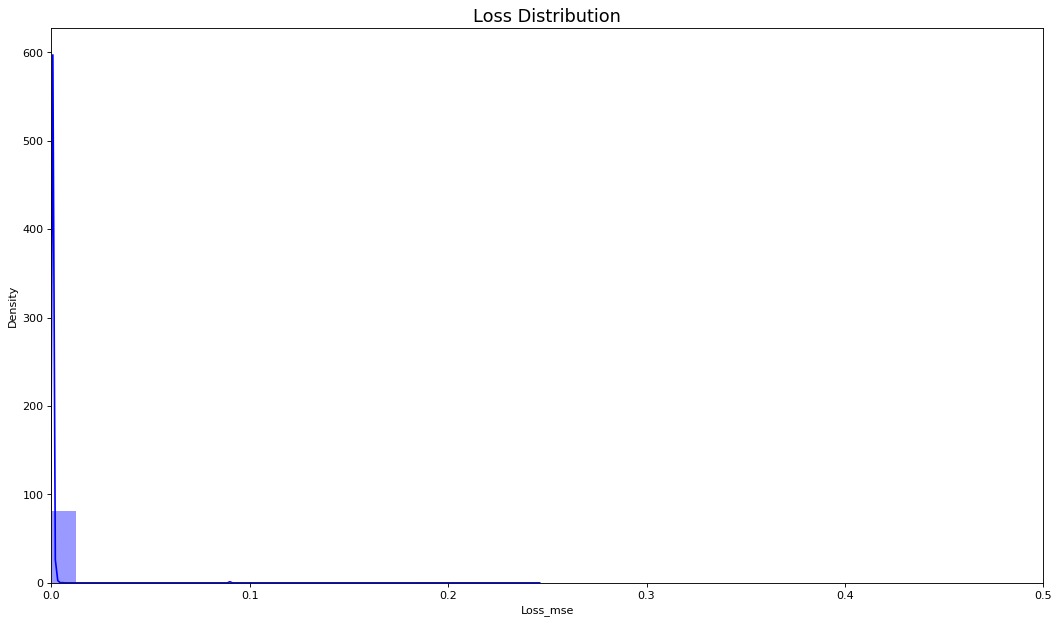

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(x_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = x_train.reshape(x_train.shape[0], x_train.shape[2])
scored['Loss_mse'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [ ]:
# calculate the loss on the test set
X_pred = model.predict(x_out_val)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=x_out.columns)
X_pred.index = x_out.index

scored = pd.DataFrame(index=x_out.index)
Xtest = x_out.values.reshape(x_out.shape[0], x_out.shape[1])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.015
scored['Anomaly'] = np.where(scored['Loss_mae'] > scored['Threshold'], -1, 1)
scored.head()
test_pred = scored.Anomaly
from sklearn.metrics import classification_report
print(classification_report(true_labels, test_pred))

3188/3188 [==============================] - 10s 3ms/step
              precision    recall  f1-score   support

          -1       0.83      0.54      0.65      3737
           1       0.98      1.00      0.99     98263

    accuracy                           0.98    102000
   macro avg       0.91      0.77      0.82    102000
weighted avg       0.98      0.98      0.98    102000



In [ ]:
Counter(test_pred)

Counter({1: 101577, -1: 423})

In [ ]:
scored.head()

,Loss_mae,Threshold,Anomaly
0,0.065152,0.1,1
1,0.065152,0.1,1
2,0.065152,0.1,1
3,0.065152,0.1,1
4,0.117052,0.1,-1


In [ ]:
scored.shape

(102000, 3)

In [ ]:
clf = IsolationForest(n_estimators=200, contamination = 0.02)

In [ ]:
from pyod.models.copod import COPOD
if __name__ == "__main__":

    # train COPOD detector
    clf_name = 'COPOD'
    clf = COPOD(contamination=0.01)

    # you could try parallel version as well.
    # clf = COPOD(n_jobs=2)
    clf.fit(train)
    pred_test = clf.predict(x_out)

if (pred_test == 1).any():
    pred_test[pred_test == 1] = -1

if (pred_test == 0).any():
    pred_test[pred_test == 0] = 1

Counter(pred_test)

from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

ModuleNotFoundError: ignored

In [ ]:
from pyod.models.ecod import ECOD
if __name__ == "__main__":

    # train COPOD detector
    clf_name = 'ECOD'
    clf = ECOD(contamination=0.015)

    # you could try parallel version as well.
    # clf = COPOD(n_jobs=2)
    clf.fit(train)
    pred_test = clf.predict(x_out)

if (pred_test == 1).any():
    pred_test[pred_test == 1] = -1

if (pred_test == 0).any():
    pred_test[pred_test == 0] = 1

Counter(pred_test)

from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

              precision    recall  f1-score   support

          -1       0.71      1.00      0.83      3737
           1       1.00      0.98      0.99     98263

    accuracy                           0.99    102000
   macro avg       0.86      0.99      0.91    102000
weighted avg       0.99      0.99      0.99    102000



In [ ]:
Counter(pred_test)

Counter({1: 96770, -1: 5230})

In [ ]:
clf_if_cv = clf.fit(train)

In [ ]:
from joblib import dump, load

# save the model
dump(clf_if_cv,'/content/drive/MyDrive/thesis/models/iforest/clf_if_cv_pca.joblib')

['/content/drive/MyDrive/thesis/models/iforest/clf_if_cv_pca.joblib']

In [ ]:
from joblib import dump, load
clf_if_cv = load('/content/drive/MyDrive/thesis/models/iforest/clf_if_cv_pca.joblib')

In [ ]:
pred_test = clf_if_cv.predict(x_out)

In [ ]:
Counter(pred_test)

Counter({1: 97685, -1: 4315})

In [ ]:
true_labels = df_outlier.label

In [ ]:
df_validate['label'] = pred_test

In [ ]:
df_validate[df_validate['label'] == -1].to_csv('/content/drive/MyDrive/thesis/models/iforest/cv_pca_results_val.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

              precision    recall  f1-score   support

          -1       0.83      0.96      0.89      3737
           1       1.00      0.99      1.00     98263

    accuracy                           0.99    102000
   macro avg       0.92      0.98      0.95    102000
weighted avg       0.99      0.99      0.99    102000



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the true labels for the dataset in 'true_labels' and the LOF predictions in 'lof_predictions'

# Convert LOF scores to binary labels based on a threshold (e.g., outliers with scores above the threshold are considered anomalies)

# Calculate accuracy
accuracy = accuracy_score(true_labels, pred_test)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, pred_test)
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, pred_test)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(true_labels, pred_test)
print("F1 Score:", f1)

Accuracy: 0.9916666666666667
Precision: 0.9986077698725495
Recall: 0.9927337858603951
F1 Score: 0.9956621144385245


CV+**AE rerun

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/thesis/train/reduce_ae_cv.csv', sep=',')
x_out = pd.read_csv('/content/drive/MyDrive/thesis/val/val-reduce_ae_cv.csv', sep=',')

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,1.145165,0.868509,1.334151,0.0,1.515522,2.182882,1.765377,...,1.548166,2.091231,0.599721,0.0,0.000000,0.000000,0.0,0.0,0.579391,1.322915
1,0.0,0.0,0.0,1.145165,0.868509,1.334151,0.0,1.515522,2.182882,1.765377,...,1.548166,2.091231,0.599721,0.0,0.000000,0.000000,0.0,0.0,0.579391,1.322915
2,0.0,0.0,0.0,1.145165,0.868509,1.334151,0.0,1.515522,2.182882,1.765377,...,1.548166,2.091231,0.599721,0.0,0.000000,0.000000,0.0,0.0,0.579391,1.322915
3,0.0,0.0,0.0,1.145165,0.868509,1.334151,0.0,1.515522,2.182882,1.765377,...,1.548166,2.091231,0.599721,0.0,0.000000,0.000000,0.0,0.0,0.579391,1.322915
4,0.0,0.0,0.0,1.817867,1.464603,0.798102,0.0,1.986785,0.928911,2.528975,...,1.542877,0.926646,1.524741,0.0,0.197812,2.034939,0.0,0.0,0.297903,0.148584


In [ ]:
x_out.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,1.145165,0.868509,1.334151,0.0,1.515522,2.182882,1.765377,...,1.548166,2.091231,0.599721,0.0,0.000000,0.000000,0.0,0.0,0.579391,1.322915
1,0.0,0.0,0.0,1.145165,0.868509,1.334151,0.0,1.515522,2.182882,1.765377,...,1.548166,2.091231,0.599721,0.0,0.000000,0.000000,0.0,0.0,0.579391,1.322915
2,0.0,0.0,0.0,1.145165,0.868509,1.334151,0.0,1.515522,2.182882,1.765377,...,1.548166,2.091231,0.599721,0.0,0.000000,0.000000,0.0,0.0,0.579391,1.322915
3,0.0,0.0,0.0,1.145165,0.868509,1.334151,0.0,1.515522,2.182882,1.765377,...,1.548166,2.091231,0.599721,0.0,0.000000,0.000000,0.0,0.0,0.579391,1.322915
4,0.0,0.0,0.0,1.817867,1.464603,0.798102,0.0,1.986785,0.928911,2.528975,...,1.542877,0.926646,1.524741,0.0,0.197812,2.034939,0.0,0.0,0.297903,0.148584


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
x_scaled = mm_scaler.fit_transform(df)

In [ ]:
x_val= mm_scaler.transform(x_out)

In [ ]:
x_val_scaled.shape

(102000, 32)

In [ ]:
split_len = 0.3 * len(x_scaled)
split_len

306302.7

In [ ]:
test = x_scaled[:int(split_len)]
train = x_scaled[int(split_len):]

In [ ]:
x_t = pd.DataFrame(train)

In [ ]:
x_t.shape

(714707, 32)

In [ ]:
x_train = train.reshape(train.shape[0], 1, train.shape[1])
x_test = test.reshape(test.shape[0], 1,train.shape[1])

x_out_val = x_val.reshape(x_val.shape[0], 1,x_val.shape[1])

#define the model

def autoencoder_model(X):

  inputs = Input(shape=(X.shape[1], X.shape[2]))
  L1 = Bidirectional(LSTM(128, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00)))(inputs)
  L2 = Bidirectional(LSTM(64, activation='relu', return_sequences=False))(L1)
  L3 = RepeatVector(X.shape[1])(L2)
  L4 = Bidirectional(LSTM(64, activation='relu', return_sequences=True))(L3)
  L5 = Bidirectional(LSTM(128, activation='relu', return_sequences=True))(L4)
  output = TimeDistributed(Dense(X.shape[2]))(L5)
  model = Model(inputs=inputs, outputs=output)
  return model
# create the autoencoder model
model = autoencoder_model(x_train)
model.compile(optimizer='adam', loss=['mse'],
              metrics=['mae', 'acc', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model.summary()

nb_epochs = 10
batch_size = 1000
history = model.fit(x_train, x_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.15).history

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 32)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 128)            82432     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector (RepeatVector  (None, 1, 64)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 1, 128)            98816     
                                                             

22335/22335 [==============================] - 53s 2ms/step


<ipython-input-24-7446607c554b>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue');


(0.0, 0.5)

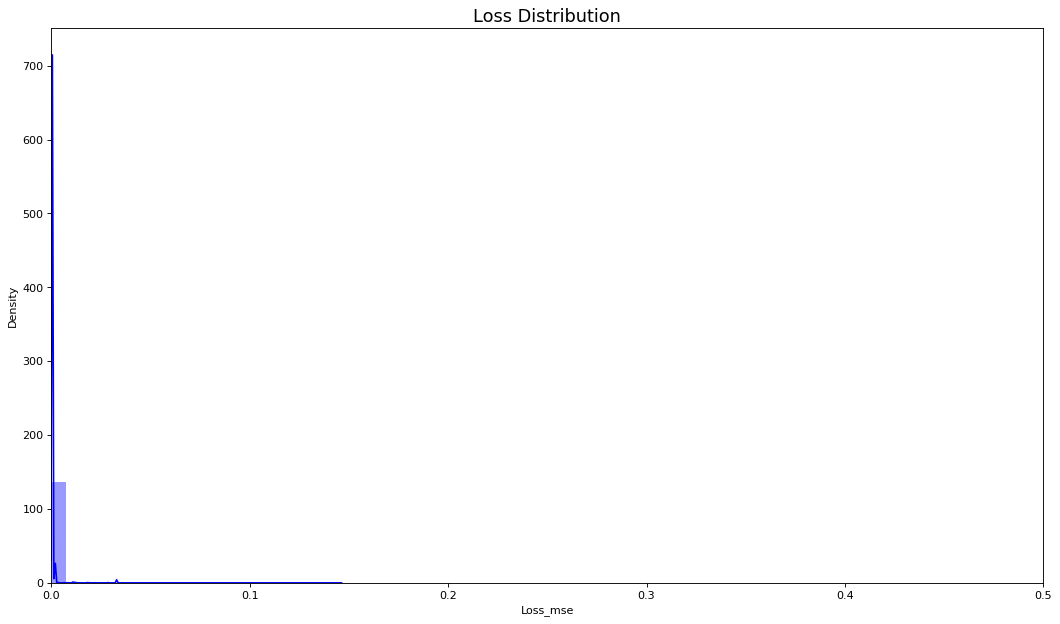

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(x_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=x_t.columns)
X_pred.index = x_t.index

scored = pd.DataFrame(index=x_t.index)
Xtrain = x_train.reshape(x_train.shape[0], x_train.shape[2])
scored['Loss_mse'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mse'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [ ]:
# calculate the loss on the test set
X_pred = model.predict(x_out_val)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=x_out.columns)
X_pred.index = x_out.index

scored = pd.DataFrame(index=x_out.index)
Xtest = x_val.reshape(x_val.shape[0], x_val.shape[1])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.003
scored['Anomaly'] = np.where(scored['Loss_mae'] > scored['Threshold'], -1, 1)
scored.head()
test_pred = scored.Anomaly
from sklearn.metrics import classification_report
print(classification_report(true_labels, test_pred))

3188/3188 [==============================] - 7s 2ms/step
              precision    recall  f1-score   support

          -1       0.61      0.62      0.62      3737
           1       0.99      0.99      0.99     98263

    accuracy                           0.97    102000
   macro avg       0.80      0.80      0.80    102000
weighted avg       0.97      0.97      0.97    102000



In [ ]:
scored.head()

,Loss_mae,Threshold,Anomaly
0,0.000095,0.003,1
1,0.000095,0.003,1
2,0.000095,0.003,1
3,0.000095,0.003,1
4,0.000491,0.003,1


In [ ]:
Counter(test_pred)

Counter({1: 98255, -1: 3745})

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(true_labels, test_pred))

              precision    recall  f1-score   support

          -1       0.61      0.62      0.62      3737
           1       0.99      0.99      0.99     98263

    accuracy                           0.97    102000
   macro avg       0.80      0.80      0.80    102000
weighted avg       0.97      0.97      0.97    102000



In [ ]:
from pyod.models.ecod import ECOD
if __name__ == "__main__":

    # train COPOD detector
    clf_name = 'ECOD'
    clf = ECOD(contamination=0.065)

    # you could try parallel version as well.
    # clf = COPOD(n_jobs=2)
    clf.fit(train)
    pred_test = clf.predict(x_val_scaled)

if (pred_test == 1).any():
    pred_test[pred_test == 1] = -1

if (pred_test == 0).any():
    pred_test[pred_test == 0] = 1

Counter(pred_test)

from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

              precision    recall  f1-score   support

          -1       0.41      0.99      0.58      3737
           1       1.00      0.95      0.97     98263

    accuracy                           0.95    102000
   macro avg       0.70      0.97      0.78    102000
weighted avg       0.98      0.95      0.96    102000



In [ ]:

Counter(pred_test)

Counter({1: 97321, -1: 4679})

In [ ]:
from pyod.models.copod import COPOD
if __name__ == "__main__":

    # train COPOD detector
    clf_name = 'COPOD'
    clf = COPOD(contamination=0.08)

    # you could try parallel version as well.
    # clf = COPOD(n_jobs=2)
    clf.fit(train)
    pred_test = clf.predict(x_val_scaled)

if (pred_test == 1).any():
    pred_test[pred_test == 1] = -1

if (pred_test == 0).any():
    pred_test[pred_test == 0] = 1

Counter(pred_test)

from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

              precision    recall  f1-score   support

          -1       0.11      0.17      0.13      3737
           1       0.97      0.95      0.96     98263

    accuracy                           0.92    102000
   macro avg       0.54      0.56      0.55    102000
weighted avg       0.94      0.92      0.93    102000



In [ ]:
Counter(pred_test)

Counter({1: 96006, -1: 5994})

In [ ]:
clf = IsolationForest(n_estimators=100, contamination = 0.01)

In [ ]:
clf_if_cv = clf.fit(train)

In [ ]:
from joblib import dump, load

# save the model
dump(clf_if_cv,'/content/drive/MyDrive/thesis/models/iforest/clf_if_cv_ae.joblib')

['/content/drive/MyDrive/thesis/models/iforest/clf_if_cv_pca.joblib']

In [ ]:
from joblib import dump, load
clf_if_cv = load('/content/drive/MyDrive/thesis/models/iforest/clf_if_cv_ae.joblib')

In [ ]:
pred_test = clf_if_cv.predict(x_out_cv_scale)

In [ ]:
Counter(pred_test)

Counter({1: 93967, -1: 8033})

In [ ]:
true_labels = df_outlier.label

In [ ]:
df_validate['label'] = pred_test

In [ ]:
df_validate[df_validate['label'] == -1].to_csv('/content/drive/MyDrive/thesis/models/iforest/cv_ae_results_val.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_test))

              precision    recall  f1-score   support

          -1       0.38      0.82      0.52      3737
           1       0.99      0.95      0.97     98263

    accuracy                           0.94    102000
   macro avg       0.69      0.88      0.75    102000
weighted avg       0.97      0.94      0.95    102000



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the true labels for the dataset in 'true_labels' and the LOF predictions in 'lof_predictions'

# Convert LOF scores to binary labels based on a threshold (e.g., outliers with scores above the threshold are considered anomalies)

# Calculate accuracy
accuracy = accuracy_score(true_labels, pred_test)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, pred_test)
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, pred_test)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(true_labels, pred_test)
print("F1 Score:", f1)

Accuracy: 0.9445686274509804
Precision: 0.9927740589781519
Recall: 0.9493705667443494
F1 Score: 0.9705873172761795


In [ ]:
import numpy as np

# Assuming you have a list of models and their predictions
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
predictions = np.array([[1, 0, 1, 1],  # Predictions of Model 1
                        [0, 1, 0, 1],  # Predictions of Model 2
                        [1, 0, 1, 0],  # Predictions of Model 3
                        [0, 1, 1, 1]]) # Predictions of Model 4

# Consensus Voting
consensus_predictions = []
num_instances = predictions.shape[1]

for i in range(num_instances):
    instance_predictions = predictions[:, i]
    unique_predictions, counts = np.unique(instance_predictions, return_counts=True)

    if len(unique_predictions) == 1:
        # All models agree on the prediction
        consensus_prediction = unique_predictions[0]
    else:
        # Models have different predictions, break the tie using a rule
        # For example, select the majority class
        majority_prediction = unique_predictions[np.argmax(counts)]
        consensus_prediction = majority_prediction

    consensus_predictions.append(consensus_prediction)

# Print the consensus predictions
print("Consensus Predictions:", consensus_predictions)


Consensus Predictions: [0, 0, 1, 1]
